In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
df = pd.read_csv("../data/coches_segunda_mano-19-02-2025_limpio.csv")

In [4]:
df

modelo_titulo provincia  \
0                                      308 1.4 95cv 5p.    Lleida   
1     León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop S...    Lleida   
2                          308 1.5BlueHDi S&S Style 130    Lleida   
3              Grandland X Grand Land 1.6CDTI Selective    Lleida   
4                  A3 Sportback Sportback 35 TFSI 150cv    Lleida   
...                                                 ...       ...   
4773          Q2 ADVANCED 30 TFSI 81(110) KW(CV) 6 VEL.    Murcia   
4774                       Golf 2.0TDI Sport DSG7 110kW    Madrid   
4775                           A6 Avant 40 TDI S tronic    Murcia   
4776                      Touran 2.0TDI Life DSG7 110kW    Madrid   
4777                            Taigo 1.0 TSI Life 81kW    Madrid   

      kilometraje combustible distintivo_ambiental  garantia  \
0          142137    Gasolina                    C      12.0   
1          106736      Diésel                  NaN      12.0   
2           68314      Diésel                    C      12.0   
3           55531      Diésel                  NaN      12.0   
4           75800    Gasolina                    C      12.0   
...           ...         ...                  ...       ...   
4773        56640    Gasolina                    C      12.0   
4774        42000      Diésel                    C      12.0   
4775        24304      Diésel                  ECO      12.0   
4776         5000      Diésel                    C      12.0   
4777         5000    Gasolina                    C      12.0   

      cambio_automatico         carroceria  plazas  potencia  ...  \
0                 False            Berlina     NaN      95.0  ...   
1                 False           Familiar     NaN     116.0  ...   
2                 False            Berlina     5.0     130.0  ...   
3                 False  4x4, SUV o pickup     NaN     120.0  ...   
4                 False            Berlina     NaN     150.0  ...   
...                 ...                ...     ...       ...  ...   
4773              False  4x4, SUV o pickup     NaN     110.0  ...   
4774               True            Berlina     5.0     150.0  ...   
4775               True           Familiar     5.0     204.0  ...   
4776               True        Monovolumen     7.0     150.0  ...   
4777              False       Todo Terreno     5.0     110.0  ...   

                fecha_extraccion referencia  \
0     2025-02-19 17:01:36.887580   14946771   
1     2025-02-19 17:01:44.312012   14962083   
2     2025-02-19 17:01:54.282640   15014897   
3     2025-02-19 17:02:02.672957   15027844   
4     2025-02-19 17:02:11.380113   15068938   
...                          ...        ...   
4773  2025-02-20 16:50:19.841595   15333890   
4774  2025-02-20 16:50:28.065854   15450596   
4775  2025-02-20 16:50:37.503167   15333884   
4776  2025-02-20 16:58:50.765870   15414020   
4777  2025-02-20 16:59:00.820588   12854839   

                                                    url  \
0     https://www.autocasion.com/coches-segunda-mano...   
1     https://www.autocasion.com/coches-segunda-mano...   
2     https://www.autocasion.com/coches-segunda-mano...   
3     https://www.autocasion.com/coches-segunda-mano...   
4     https://www.autocasion.com/coches-segunda-mano...   
...                                                 ...   
4773  https://www.autocasion.com/coches-segunda-mano...   
4774  https://www.autocasion.com/coches-segunda-mano...   
4775  https://www.autocasion.com/coches-segunda-mano...   
4776  https://www.autocasion.com/coches-km0/km-0/vol...   
4777  https://www.autocasion.com/coches-km0/km-0/vol...   

                                            ruta_imagen  marca_sola  \
0     ../img/coches/14946771-0-5926368496749e1fa4cfb...     PEUGEOT   
1     ../img/coches/14962083-0-824922025674e0c07cb9c...        SEAT   
2     ../img/coches/15014897-0-1402892972675898157d3...     PEUGEOT   
3     ../img/coches/15027844-0-557393874675b05f31fab...  

Transformaciones a las categorias

In [5]:
df["carroceria"].unique()

array(['Berlina', 'Familiar', '4x4, SUV o pickup', 'Todo Terreno',
       'Descapotable o convertible', 'Deportivo o coupé', 'Monovolumen',
       'Pequeño', nan], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo_titulo                4778 non-null   object 
 1   provincia                    4778 non-null   object 
 2   kilometraje                  4778 non-null   int64  
 3   combustible                  4751 non-null   object 
 4   distintivo_ambiental         4377 non-null   object 
 5   garantia                     4778 non-null   float64
 6   cambio_automatico            4778 non-null   bool   
 7   carroceria                   4774 non-null   object 
 8   plazas                       3241 non-null   float64
 9   potencia                     4753 non-null   float64
 10  puertas                      4778 non-null   int64  
 11  color                        4778 non-null   object 
 12  precio                       4777 non-null   float64
 13  vendedor_profesion

## Relación de variables entre si

In [7]:
columnas_categoricas = ['distintivo_ambiental', 'garantia', 'carroceria', 'plazas', 'puertas', 'consumo_medio', 'vendedor_profesional']

In [8]:
def formatear_texto(columna):
    return columna.replace('_', ' ').title()

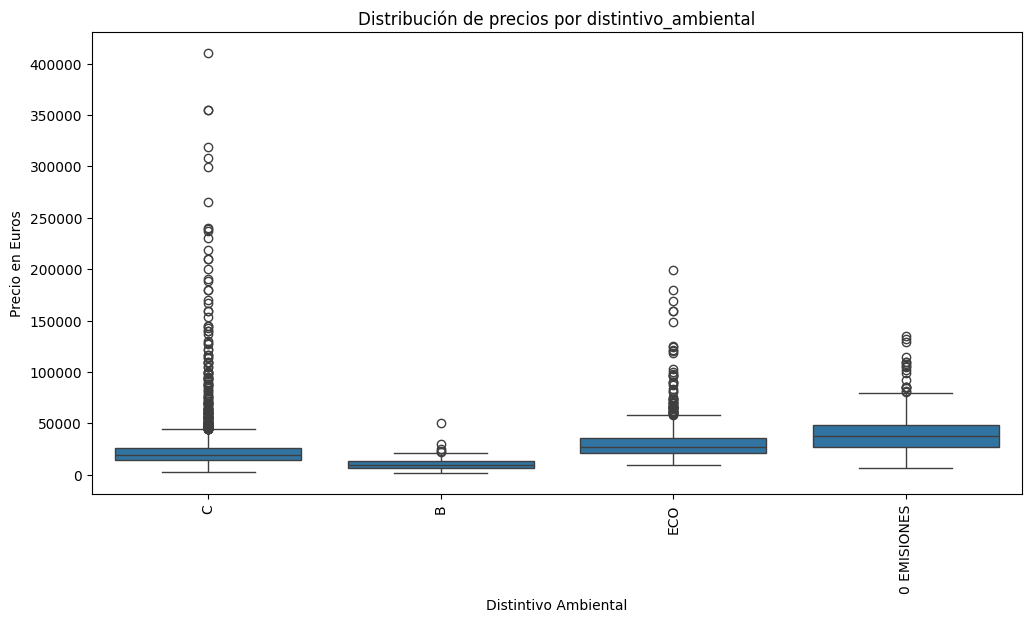

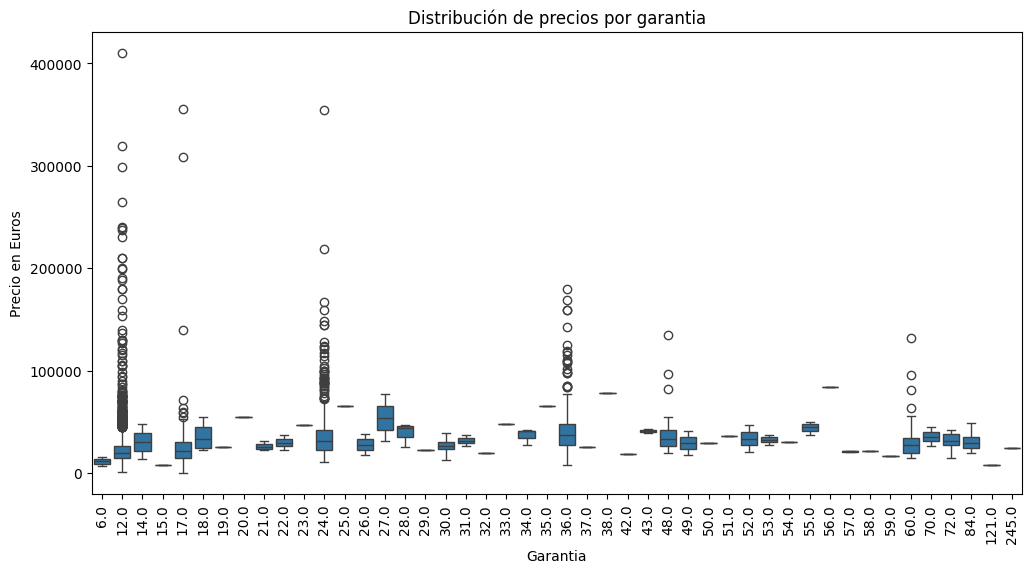

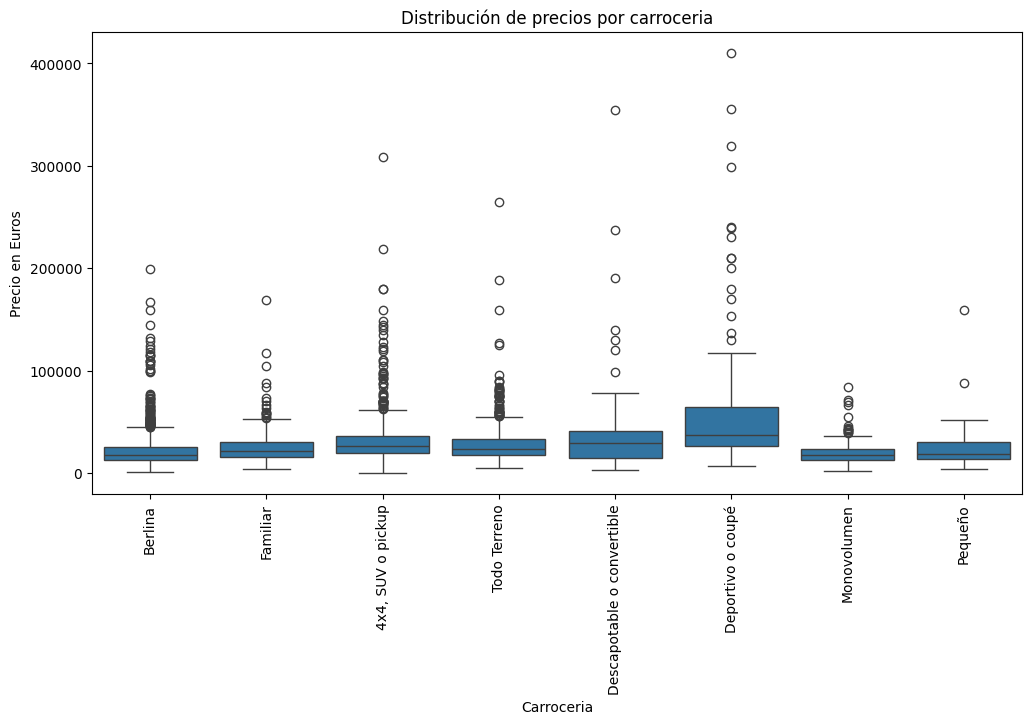

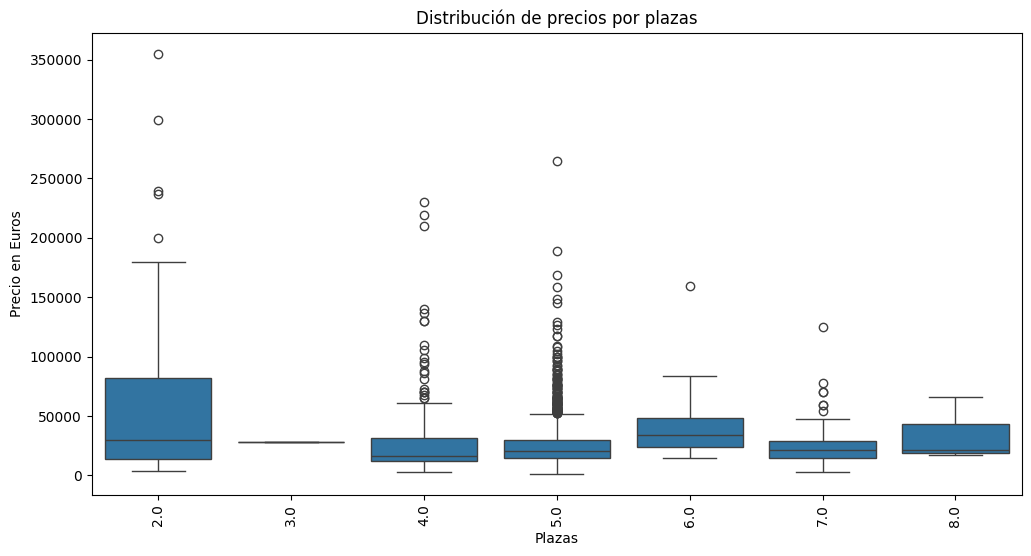

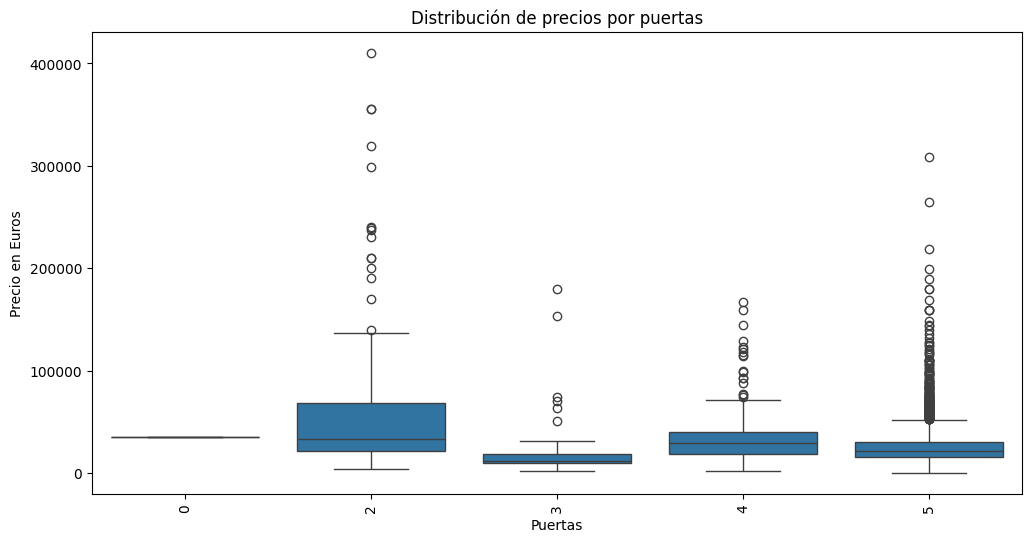

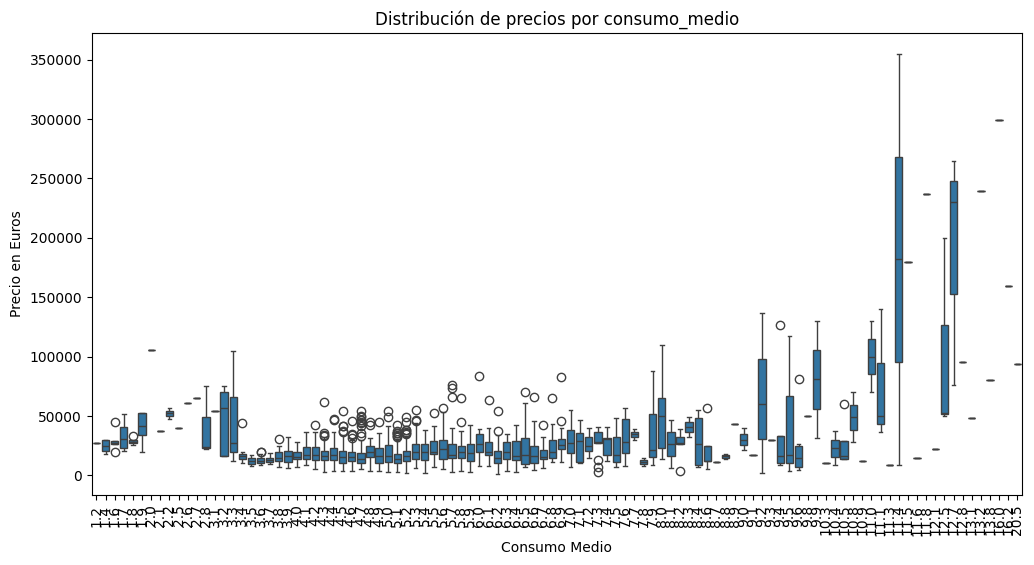

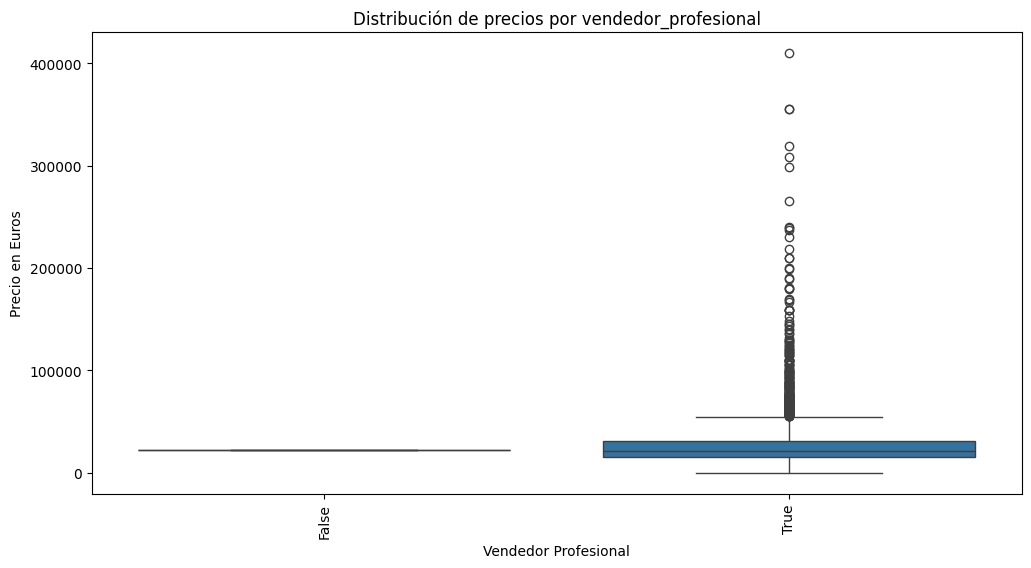

In [9]:
for columna in columnas_categoricas:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x= columna, y='precio', data=df)
    plt.xlabel(f"{formatear_texto(columna)}") 
    plt.ylabel("Precio en Euros")
    plt.xticks(rotation=90)
    plt.title(f'Distribución de precios por {columna}')
    plt.show()

In [10]:
columnas_numericas = []

for columna in df.columns:
    if (df[columna].dtype in [np.float64, np.int64]) and (columna != 'referencia'):
        columnas_numericas.append(columna)

columnas_numericas


['kilometraje',
 'garantia',
 'plazas',
 'potencia',
 'puertas',
 'precio',
 'consumo_medio',
 'mes_matricula',
 'anio_matricula']

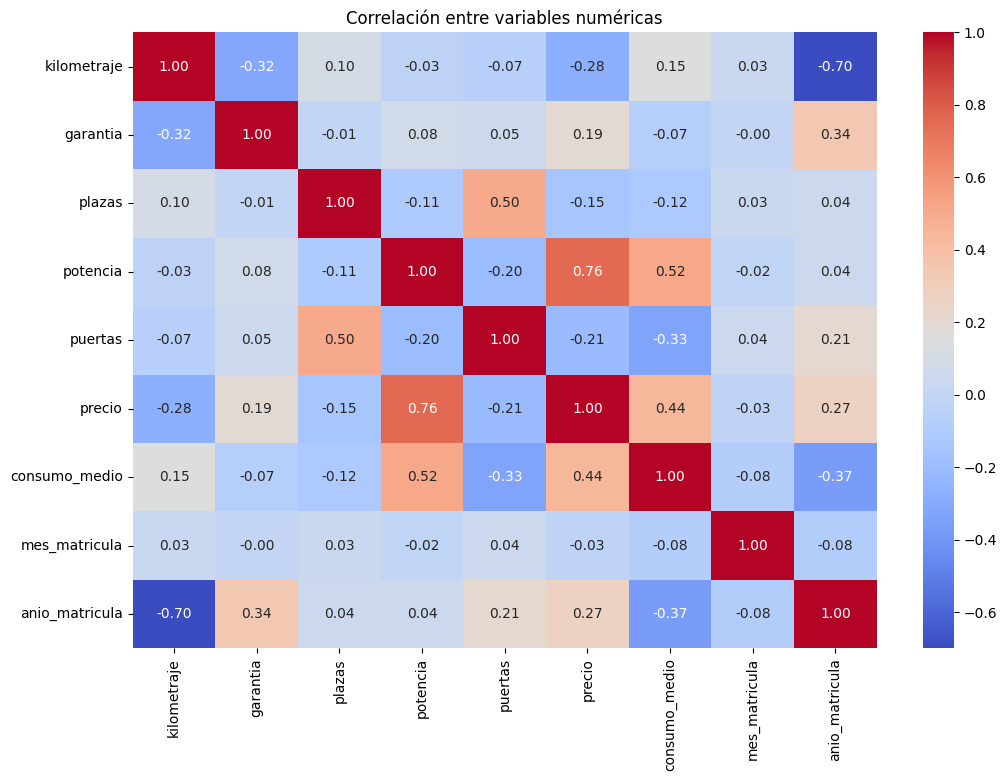

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df[columnas_numericas].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas')
plt.show()

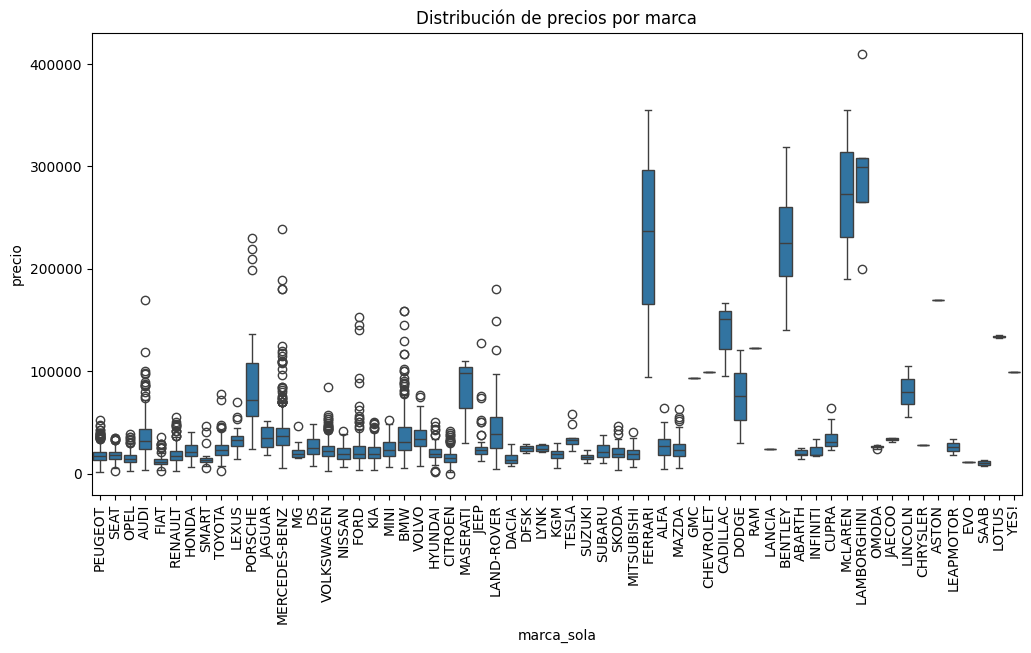

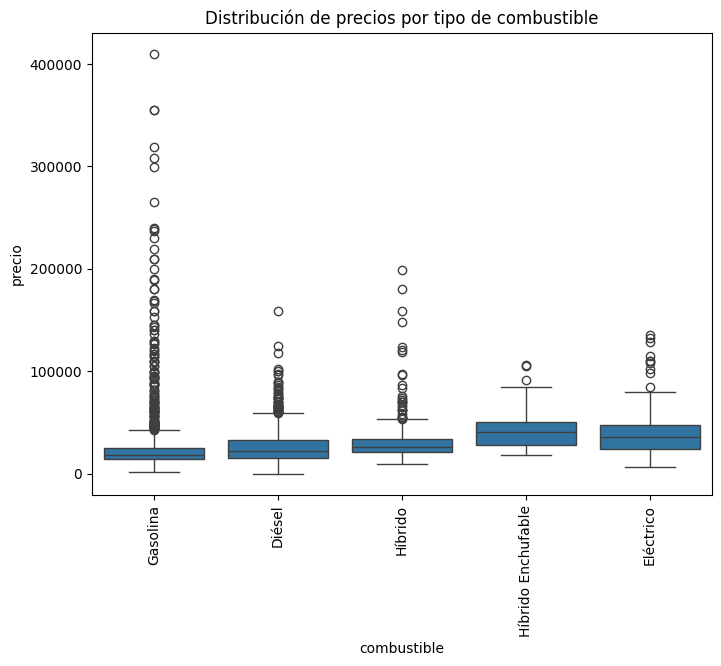

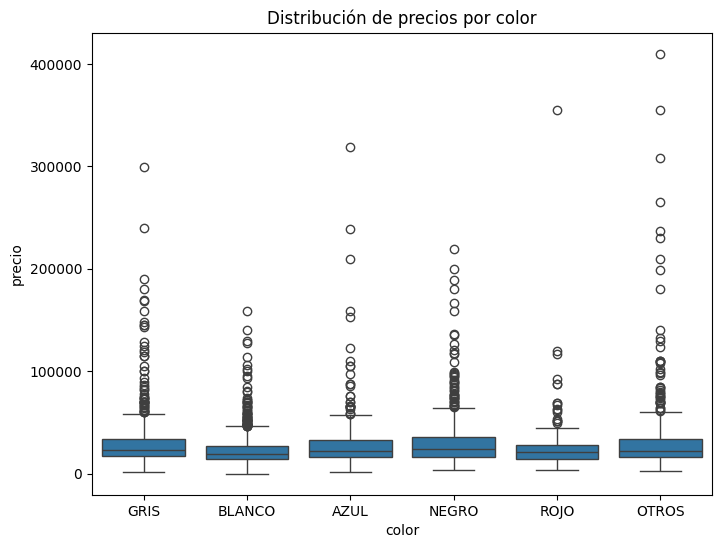

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='marca_sola', y='precio', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de precios por marca')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='combustible', y='precio', data=df)
plt.title('Distribución de precios por tipo de combustible')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='precio', data=df)
plt.title('Distribución de precios por color')
plt.show()

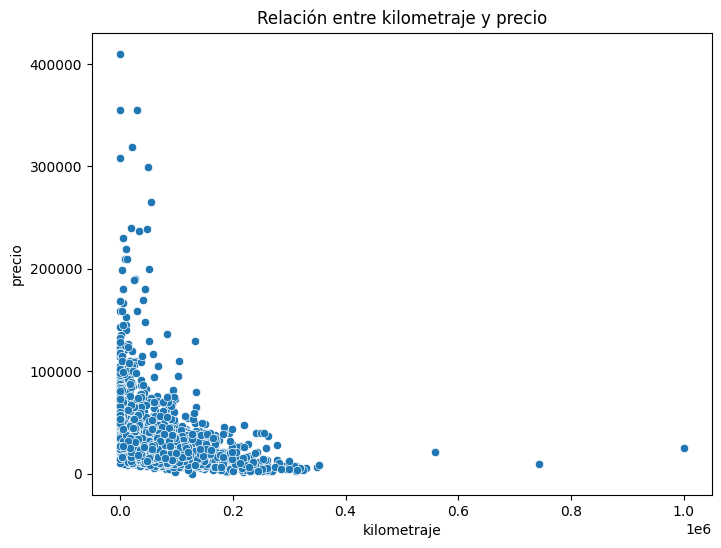

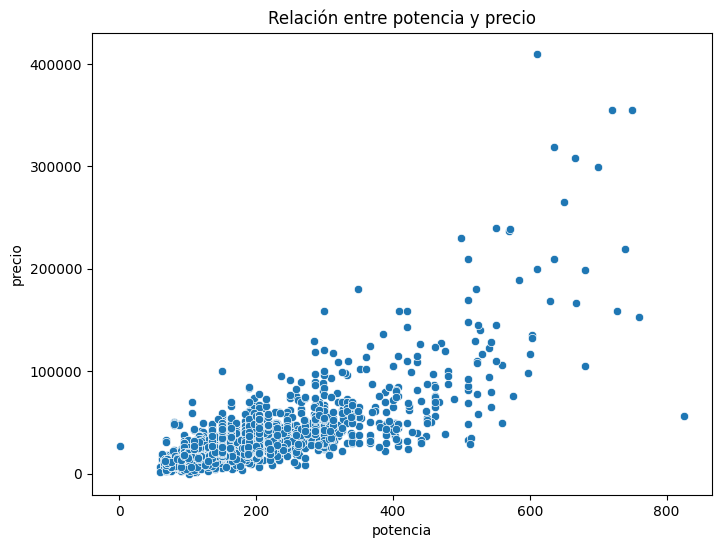

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='kilometraje', y='precio', data=df)
plt.title('Relación entre kilometraje y precio')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='potencia', y='precio', data=df)
plt.title('Relación entre potencia y precio')
plt.show()

## Relación precio y antigüedad de coches

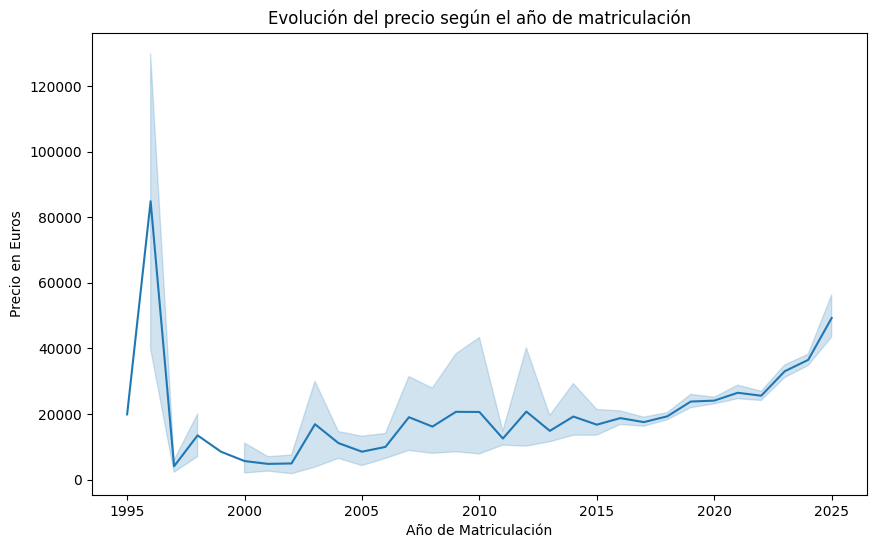

In [14]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='anio_matricula', y='precio', data=df)
plt.title('Evolución del precio según el año de matriculación')
plt.xlabel("Año de Matriculación") 
plt.ylabel("Precio en Euros")
plt.show()

In [15]:
concesionarios = pd.read_csv("../data/concesionarios.csv")

In [16]:
concesionarios.columns 

Index(['nombre', 'calle', 'municipio', 'provincia', 'codigo_postal'], dtype='object')

In [17]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor_profesional',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

In [18]:
concesionarios["municipio"] = concesionarios["municipio"].str.replace("Municipio: ", "", regex=True)

concesionarios["codigo_postal"] = concesionarios["codigo_postal"].str.extract(r"(\d+)") 

concesionarios['nombre'] = concesionarios['nombre'].apply(lambda x: x.upper())
concesionarios = concesionarios.rename(columns={'nombre': 'nombre_vendedor_profesional'})
concesionarios = concesionarios[["nombre_vendedor_profesional", "municipio", "codigo_postal"]]
concesionarios

nombre_vendedor_profesional             municipio codigo_postal
0     --AUTOMOVILES VIA NORTE --                 Naron         15570
1                    *ACS MOTOR*               Iniesta         16235
2                   + QUE COCHES  Talavera de la reina         45600
3                       11ELEVEN                Madrid         28294
4                13 PREMIUM CARS                Aldaia         46960
...                          ...                   ...           ...
4076                     ZENCARS                Madrid         28049
4077  ZENTRO MACHINE- CASE, S.A.                   NaN           NaN
4078            ZOANSA TAILERRAK       Lesaka, navarra         31770
4079              ZOE AUTOMOCION               Sonseca         45100
4080              ZYLAUTOS MOTOR              Valencia         46017

[4081 rows x 3 columns]

In [19]:
df_unido = pd.merge(df, concesionarios, on='nombre_vendedor_profesional', how='left')

In [20]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo_titulo                4778 non-null   object 
 1   provincia                    4778 non-null   object 
 2   kilometraje                  4778 non-null   int64  
 3   combustible                  4751 non-null   object 
 4   distintivo_ambiental         4377 non-null   object 
 5   garantia                     4778 non-null   float64
 6   cambio_automatico            4778 non-null   bool   
 7   carroceria                   4774 non-null   object 
 8   plazas                       3241 non-null   float64
 9   potencia                     4753 non-null   float64
 10  puertas                      4778 non-null   int64  
 11  color                        4778 non-null   object 
 12  precio                       4777 non-null   float64
 13  vendedor_profesion

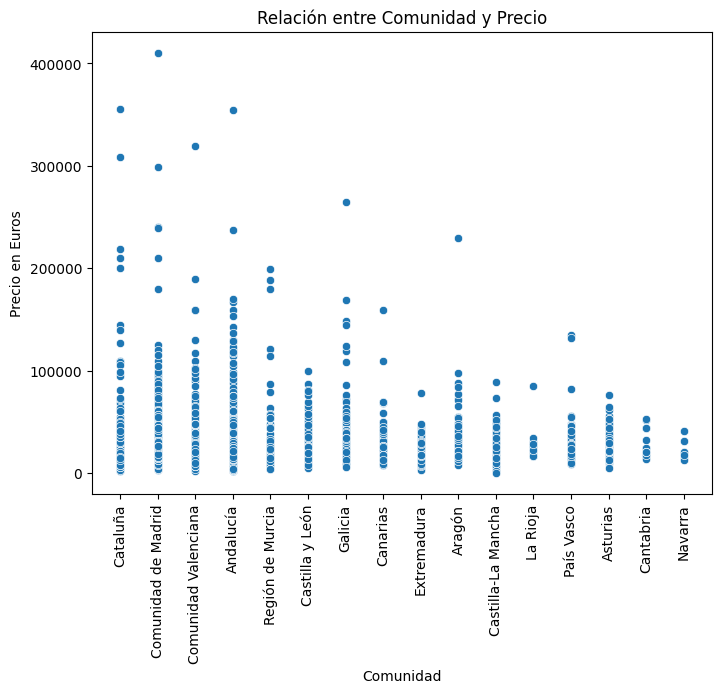

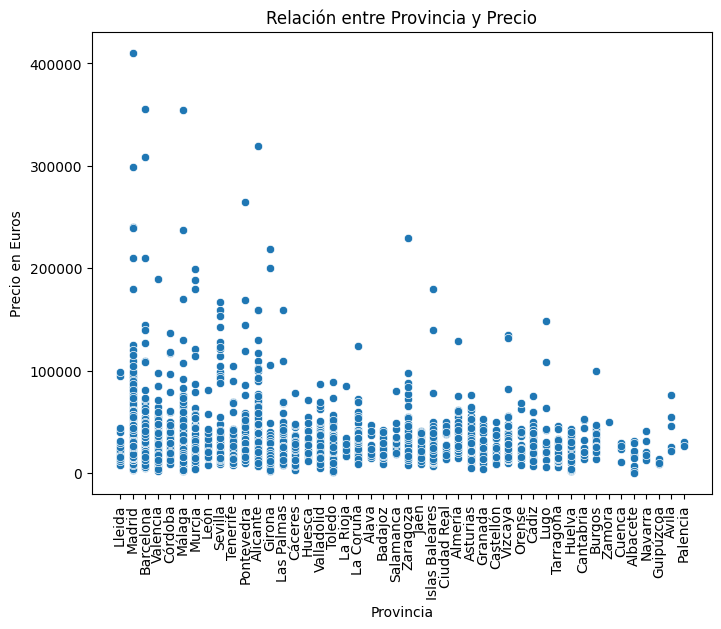

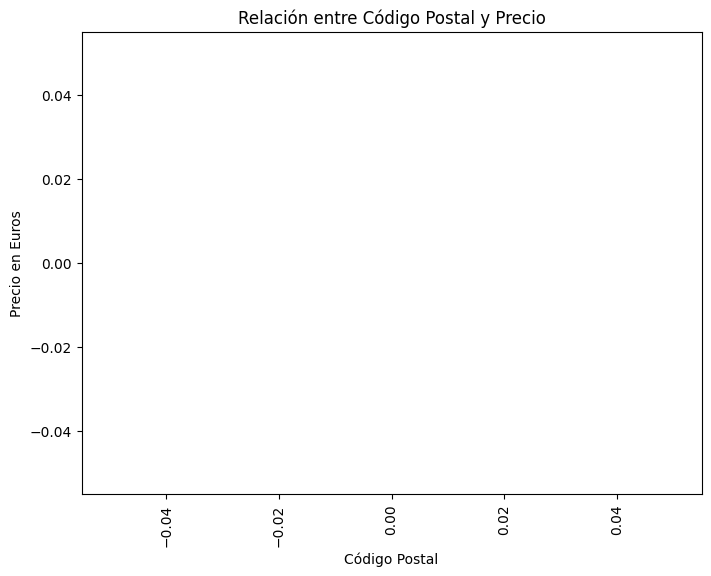

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='comunidad', y='precio', data=df)
plt.title('Relación entre Comunidad y Precio')
plt.xticks(rotation=90)
plt.xlabel("Comunidad") 
plt.ylabel("Precio en Euros")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='provincia', y='precio', data=df)
plt.title('Relación entre Provincia y Precio')
plt.xlabel("Provincia") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='codigo_postal', y='precio', data=df_unido)
plt.title('Relación entre Código Postal y Precio')
plt.xlabel("Código Postal") 
plt.ylabel("Precio en Euros")
plt.xticks(rotation=90)
plt.show()

In [22]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor_profesional',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

## Definir dos gráficos 


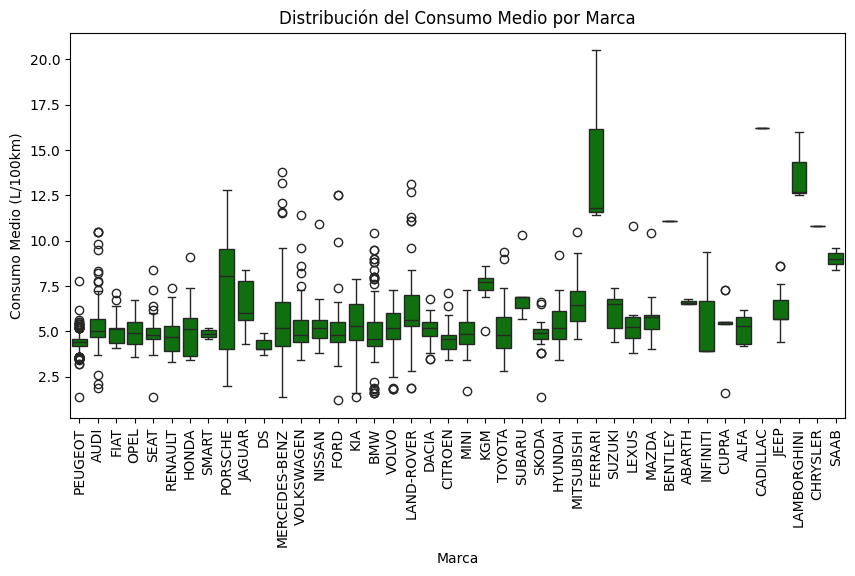

In [23]:
#Relación de consumo medio por marca
plt.figure(figsize=(10,5))

df_consumo = df[df['consumo_medio']>0] 

sns.boxplot(x='marca_sola', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Marca')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por Marca')
plt.xticks(rotation=90)

plt.show()


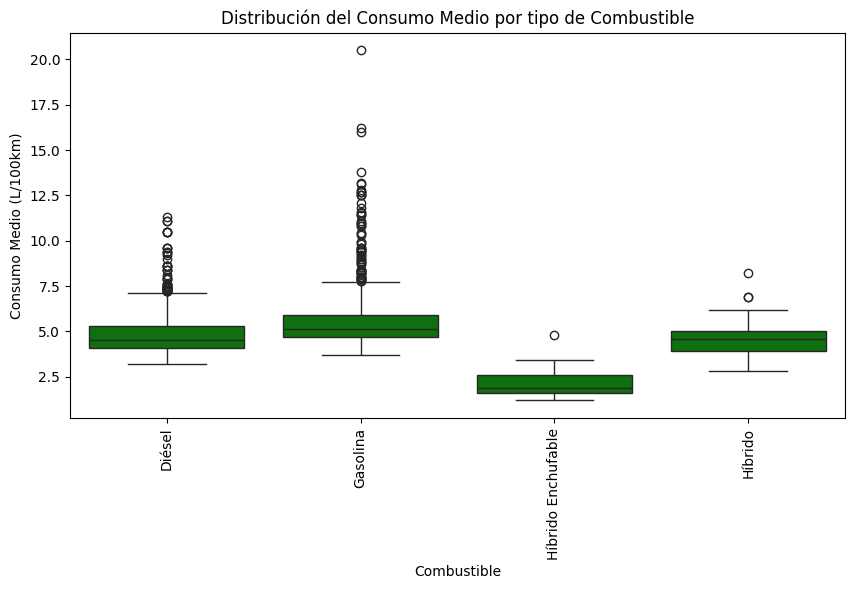

In [24]:
#Relación de consumo medio por tipo de combustible
plt.figure(figsize=(10,5))

sns.boxplot(x='combustible', y='consumo_medio', data=df_consumo, color= 'green')

plt.xlabel('Combustible')
plt.ylabel('Consumo Medio (L/100km)')
plt.title('Distribución del Consumo Medio por tipo de Combustible')
plt.xticks(rotation=90)

plt.show()

## Gráfico de outliers


La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).


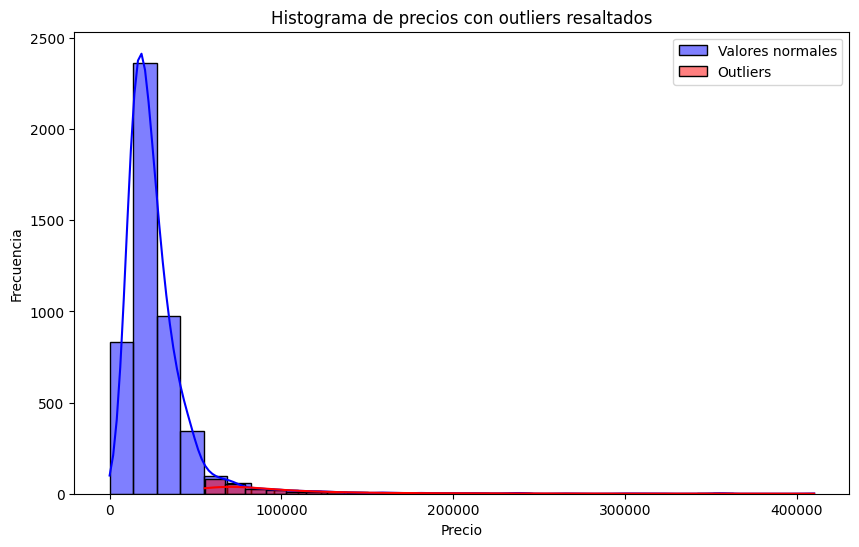

18       56400.0
82       57990.0
148      86990.0
179      68900.0
193     236999.0
          ...   
4659     56390.0
4743     73750.0
4752     57500.0
4769     57000.0
4772     86900.0
Name: precio, Length: 245, dtype: float64

In [25]:
from scipy.stats import normaltest, zscore

columna = "precio"

stat, p_value = normaltest(df[columna].dropna())  

# Si p > 0.05 tiene distribucion normal y usamos Z-Score, si no usamos Tukey
if p_value > 0.05:
    print("La distribución de precios es normal (p > 0.05), usaremos Z-Score.")
    z = 3  
    z_scores = zscore(df[columna].dropna())
    outliers = df[np.abs(z_scores) > z]
else:
    print("La distribución de precios NO es normal (p <= 0.05), usaremos IQR (Tukey).")
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    ric = q3 - q1
    lim_izq= q1 - 1.5 * ric
    lim_der = q3 + 1.5 * ric
    outliers = df[(df[columna] < lim_izq) | (df[columna] > lim_der)]

plt.figure(figsize=(10, 6))
sns.histplot(df[columna], bins=30, kde=True, color="blue", label="Valores normales")
sns.histplot(outliers[columna], bins=30, kde=True, color="red", label="Outliers")

plt.title("Histograma de precios con outliers resaltados")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

outliers[columna]

## MAPA COROPLETICO

In [26]:
df_agrupado1 = df.groupby("comunidad").agg(
    cantidad_coches=("precio", "count"),
    precio_medio=("precio", "mean")
).reset_index()


In [27]:
df_agrupado1

comunidad  cantidad_coches  precio_medio
0              Andalucía              551  31546.569873
1                 Aragón              118  32301.016949
2               Asturias              151  31457.000000
3               Canarias               74  30888.648649
4              Cantabria               13  29381.538462
5        Castilla y León              153  29000.091503
6     Castilla-La Mancha               74  29905.256757
7               Cataluña              776  23999.375000
8   Comunidad Valenciana              472  31146.466102
9    Comunidad de Madrid             1830  23758.926776
10           Extremadura               90  21720.588889
11               Galicia              165  34596.666667
12              La Rioja               14  27783.571429
13               Navarra                6  23032.833333
14            País Vasco               91  27635.340659
15      Región de Murcia               49  44575.510204

In [28]:
coordenadas_dict = {
    'Andalucía': [-6.933198279, 38.20515158308281],
    'Cataluña': [1.0, 41.6],
    'Madrid': [-3.7038, 40.4168],
    'Galicia': [-8.5, 42.0],
    'Castilla y León': [-4.7, 41.6],
    'Castilla-La Mancha': [-3.5, 39.9],
    'Comunidad Valenciana': [-0.6, 39.5],
    'País Vasco': [-2.0, 43.0],
    'Aragón': [-1.0, 41.5],
    'Extremadura': [-6.0, 39.5],
    'Canarias': [-13.5, 28.3],
    'Cantabria': [-4.0, 43.3],
    'Región de Murcia': [-1.0, 38.0],
    'Baleares': [2.5, 39.5],
    'Asturias': [-6.933198279, 38.20515158308281],
    'La Rioja': [-2.0, 42.0],
    'Navarra': [-1.6, 42.7],
    'Castilla y León': [-4.7, 41.6],
    'Comunidad de Madrid': [-3.7038, 40.4168],
    'Ceuta': [-5.3, 35.9],
    'Melilla': [-2.9, 35.3]
}

df_agrupado1['coordenadas_comunidad'] = df_agrupado1['comunidad'].map(coordenadas_dict)


df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0              Andalucía              551  31546.569873   
1                 Aragón              118  32301.016949   
2               Asturias              151  31457.000000   
3               Canarias               74  30888.648649   
4              Cantabria               13  29381.538462   
5        Castilla y León              153  29000.091503   
6     Castilla-La Mancha               74  29905.256757   
7               Cataluña              776  23999.375000   
8   Comunidad Valenciana              472  31146.466102   
9    Comunidad de Madrid             1830  23758.926776   
10           Extremadura               90  21720.588889   
11               Galicia              165  34596.666667   
12              La Rioja               14  27783.571429   
13               Navarra                6  23032.833333   
14            País Vasco               91  27635.340659   
15      Región de Murcia               49  44575.510204   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                       [-2.0, 42.0]  
13                       [-1.6, 42.7]  
14                       [-2.0, 43.0]  
15                       [-1.0, 38.0]

In [29]:
df_agrupado1['comunidad'] = df_agrupado1['comunidad'].replace({
    "Comunidad Valenciana": "Comunitat Valenciana",
    "Navarra": "Comunidad Foral de Navarra",
    "Asturias":"Principado de Asturias",
})
df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0                    Andalucía              551  31546.569873   
1                       Aragón              118  32301.016949   
2       Principado de Asturias              151  31457.000000   
3                     Canarias               74  30888.648649   
4                    Cantabria               13  29381.538462   
5              Castilla y León              153  29000.091503   
6           Castilla-La Mancha               74  29905.256757   
7                     Cataluña              776  23999.375000   
8         Comunitat Valenciana              472  31146.466102   
9          Comunidad de Madrid             1830  23758.926776   
10                 Extremadura               90  21720.588889   
11                     Galicia              165  34596.666667   
12                    La Rioja               14  27783.571429   
13  Comunidad Foral de Navarra                6  23032.833333   
14                  País Vasco               91  27635.340659   
15            Región de Murcia               49  44575.510204   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                       [-2.0, 42.0]  
13                       [-1.6, 42.7]  
14                       [-2.0, 43.0]  
15                       [-1.0, 38.0]

In [30]:
df_agrupado1['precio_medio'] = df_agrupado1['precio_medio'].apply(lambda x: round(x,2))
df_agrupado1

comunidad  cantidad_coches  precio_medio  \
0                    Andalucía              551      31546.57   
1                       Aragón              118      32301.02   
2       Principado de Asturias              151      31457.00   
3                     Canarias               74      30888.65   
4                    Cantabria               13      29381.54   
5              Castilla y León              153      29000.09   
6           Castilla-La Mancha               74      29905.26   
7                     Cataluña              776      23999.38   
8         Comunitat Valenciana              472      31146.47   
9          Comunidad de Madrid             1830      23758.93   
10                 Extremadura               90      21720.59   
11                     Galicia              165      34596.67   
12                    La Rioja               14      27783.57   
13  Comunidad Foral de Navarra                6      23032.83   
14                  País Vasco               91      27635.34   
15            Región de Murcia               49      44575.51   

                coordenadas_comunidad  
0   [-6.933198279, 38.20515158308281]  
1                        [-1.0, 41.5]  
2   [-6.933198279, 38.20515158308281]  
3                       [-13.5, 28.3]  
4                        [-4.0, 43.3]  
5                        [-4.7, 41.6]  
6                        [-3.5, 39.9]  
7                         [1.0, 41.6]  
8                        [-0.6, 39.5]  
9                  [-3.7038, 40.4168]  
10                       [-6.0, 39.5]  
11                       [-8.5, 42.0]  
12                       [-2.0, 42.0]  
13                       [-1.6, 42.7]  
14                       [-2.0, 43.0]  
15                       [-1.0, 38.0]

In [31]:
import json
import plotly.express as px
import pandas as pd
import requests

geojson_url_comunidades = "https://raw.githubusercontent.com/Bross-IT/PFB_coches/refs/heads/main/src/geojson/comunidades_espana.geojson"

response = requests.get(geojson_url_comunidades)
geojson_data1 = response.json()

comunidades_geojson = pd.DataFrame([{
    'comunidad': feature['properties']['acom_name'],  
    'geometry': feature['geometry'] 
} for feature in geojson_data1['features']])

df_comunidades_coches = comunidades_geojson.merge(df_agrupado1[['comunidad', 'cantidad_coches','precio_medio']], on='comunidad', how='left')

df_comunidades_coches['cantidad_coches'] = df_comunidades_coches['cantidad_coches'].fillna(0).astype(int)
df_comunidades_coches['precio_medio'] = df_comunidades_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_comunidades_coches,
    geojson=geojson_data1,               
    locations='comunidad',                  
    featureidkey="properties.acom_name",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 36.2, "lon": -7.3},  
    zoom=4,                         
    title="Densidad de Coches en Venta y Precio Medio por Comunidad Autónoma",
    hover_data={'comunidad': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['comunidad', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Comunidad</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio medio de Coches en la Comunidad</b>: €%{customdata[2]}"
)
fig.show()

html_file_path = "../img/mapa_comunidades.html"
fig.write_html(html_file_path, full_html=True)


C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_9288\1804921474.py:21: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(


In [32]:
df.columns

Index(['modelo_titulo', 'provincia', 'kilometraje', 'combustible',
       'distintivo_ambiental', 'garantia', 'cambio_automatico', 'carroceria',
       'plazas', 'potencia', 'puertas', 'color', 'precio',
       'vendedor_profesional', 'consumo_medio', 'certificado',
       'fecha_extraccion', 'referencia', 'url', 'ruta_imagen', 'marca_sola',
       'mes_matricula', 'anio_matricula', 'nombre_vendedor_profesional',
       'peninsula_y_baleares', 'comunidad'],
      dtype='object')

In [33]:
df_agrupado2 = df.groupby('provincia').agg(
    cantidad_coches=('provincia', 'count'),  
    precio_medio=('precio', 'mean')         
).reset_index()
df_agrupado2['precio_medio'] = df_agrupado2['precio_medio'].apply(lambda x: round(x,2))
df_agrupado2.head()

provincia  cantidad_coches  precio_medio
0  Albacete                8      15520.00
1  Alicante              184      38045.78
2   Almería               45      35846.42
3  Asturias              151      31457.00
4   Badajoz               37      21480.54

In [34]:
coordenadas_provincias = {
    "Álava": (42.8467, -2.6727),
    "Albacete": (38.9943, -1.8585),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8402, -2.4679),
    "Asturias": (43.3614, -5.8593),
    "Ávila": (40.6566, -4.7003),
    "Badajoz": (38.8794, -6.9707),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3724),
    "Cádiz": (36.5298, -6.2923),
    "Cantabria": (43.1828, -3.9878),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9863, -3.9291),
    "Córdoba": (37.8882, -4.7794),
    "Cuenca": (40.0718, -2.1316),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6332, -3.1676),
    "Guipúzcoa": (43.3128, -1.9746),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1362, -0.4087),
    "Illes Balears": (39.6953, 3.0176),
    "Jaén": (37.7796, -3.7849),
    "La Coruña": (43.3623, -8.4115),
    "La Rioja": (42.2871, -2.5396),
    "Las Palmas": (28.1235, -15.4363),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "Lugo": (43.0122, -7.5589),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4213),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.6954, -1.6761),
    "Orense": (42.3366, -7.8631),
    "Palencia": (42.0097, -4.5282),
    "Pontevedra": (42.4304, -8.6441),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3886, -5.9823),
    "Soria": (41.7636, -2.4646),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3456, -1.1064),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9340),
    "Zamora": (41.5033, -5.7434),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3213),
    "Melilla": (35.2923, -2.9381)
}
df_agrupado2['coordenadas_provincias'] = df_agrupado2['provincia'].map(coordenadas_provincias)
df_agrupado2.head()

provincia  cantidad_coches  precio_medio coordenadas_provincias
0  Albacete                8      15520.00     (38.9943, -1.8585)
1  Alicante              184      38045.78      (38.3452, -0.481)
2   Almería               45      35846.42     (36.8402, -2.4679)
3  Asturias              151      31457.00     (43.3614, -5.8593)
4   Badajoz               37      21480.54     (38.8794, -6.9707)

In [35]:
geojson_url_provincias = '../src/geojson/provincias_espana.geojson'

with open(geojson_url_provincias, encoding="utf-8") as f:
    geojson_data2 = json.load(f)

In [36]:
df_provincias = set(df_agrupado2['provincia'].unique())
geojson_provincias = {feature['properties']['name'] for feature in geojson_data2['features']}

In [37]:
provincias_faltantes_geojson = df_provincias - geojson_provincias
print("Provincias en DataFrame pero NO en GeoJSON:", provincias_faltantes_geojson)

provincias_faltantes_df = geojson_provincias - df_provincias
print("Provincias en GeoJSON pero NO en DataFrame:", provincias_faltantes_df)

Provincias en DataFrame pero NO en GeoJSON: {'Alicante', 'Tenerife', 'Valencia', 'Orense', 'La Coruña', 'Vizcaya', 'Guipúzcoa', 'Álava', 'Islas Baleares', 'Castellón'}
Provincias en GeoJSON pero NO en DataFrame: {'Melilla', 'Alacant/Alicante', 'Illes Balears', 'Soria', 'Ceuta', 'Araba/Álava', 'Segovia', 'Ourense', 'Guadalajara', 'Teruel', 'València/Valencia', 'Gipuzkoa/Guipúzcoa', 'A Coruña', 'Bizkaia/Vizcaya', 'Castelló/Castellón', 'Santa Cruz De Tenerife'}


In [38]:
correccion_nombres_df = {
    "Alicante": "Alacant/Alicante",
    "Vizcaya": "Bizkaia/Vizcaya",
    "La Coruña": "A Coruña",
    "Castellón": "Castelló/Castellón",
    "Valencia": "València/Valencia",
    "Álava": "Araba/Álava",
    "Guipúzcoa": "Gipuzkoa/Guipúzcoa",
    "Orense": "Ourense",
    "Baleares": "Illes Balears",
    "Santa Cruz de Tenerife": "Santa Cruz De Tenerife"
}
df_agrupado2['provincia'] = df_agrupado2['provincia'].replace(correccion_nombres_df)
df_agrupado2.head()

provincia  cantidad_coches  precio_medio coordenadas_provincias
0          Albacete                8      15520.00     (38.9943, -1.8585)
1  Alacant/Alicante              184      38045.78      (38.3452, -0.481)
2           Almería               45      35846.42     (36.8402, -2.4679)
3          Asturias              151      31457.00     (43.3614, -5.8593)
4           Badajoz               37      21480.54     (38.8794, -6.9707)

In [39]:
geojson_url_provincias = 'https://raw.githubusercontent.com/Bross-IT/PFB_coches/refs/heads/main/src/geojson/provincias_espana.geojson'

provincias_geojson = pd.DataFrame([{
    'provincia': feature['properties']['name'],  
    'geometry': feature['geometry']
} for feature in geojson_data2['features']])

df_provincias_coches_precio = provincias_geojson.merge(df_agrupado2, on='provincia', how='left')

df_provincias_coches_precio['cantidad_coches'] = df_provincias_coches_precio['cantidad_coches'].fillna(0).astype(int)
df_provincias_coches_precio['precio_medio'] = df_provincias_coches_precio['precio_medio'].fillna(0)

fig = px.choropleth_mapbox(
    df_provincias_coches_precio,
    geojson=geojson_url_provincias,
    locations='provincia',                
    featureidkey="properties.name",  
    color='cantidad_coches',              
    color_continuous_scale="reds",        
    mapbox_style="carto-positron",        
    center={"lat": 40.416775, "lon": -3.703790},  
    zoom=4,                             
    title="Densidad de Coches en Venta y Precio Medio por Provincia",
    hover_data={'provincia': False, 'precio_medio': False},  
    custom_data=['provincia', 'cantidad_coches', 'precio_medio'],  
)

fig.update_traces(
    hovertemplate="<b>Provincia</b>: %{customdata[0]}<br><b>Cantidad de Coches</b>: %{customdata[1]}<br><b>Precio Medio</b>: %{customdata[2]:,.2f}€"
)
fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")
fig.show()

html_file_path = "../img/mapa_provincias.html"
fig.write_html(html_file_path, full_html=True)

C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_9288\2523292532.py:13: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [40]:
concesionarios = pd.read_csv("../data/concesionarios.csv")

In [41]:
df['nombre_vendedor_profesional']

0                     ASTER AUTOS\r
1                     ASTER AUTOS\r
2                     ASTER AUTOS\r
3                     ASTER AUTOS\r
4                     ASTER AUTOS\r
                   ...             
4773    AUDI HUERTAS MOTOR MURCIA\r
4774                     Matexcar\r
4775    AUDI HUERTAS MOTOR MURCIA\r
4776                      F. Tomé\r
4777                      F. Tomé\r
Name: nombre_vendedor_profesional, Length: 4778, dtype: object

In [42]:
df['nombre_vendedor_profesional'] = df['nombre_vendedor_profesional'].str.replace('\r', '', regex=False)

In [43]:
concesionarios[concesionarios['nombre'] == 'MARTINSA MOTOR']

nombre                                            calle  \
2622  MARTINSA MOTOR  Calle: C/ Moscatel, 18 - P.i. Arroyo De La Miel   

                   municipio          provincia         codigo_postal  
2622  Municipio: Benalmádema  Provincia: Málaga  Código postal: 29631

In [44]:
concesionarios["municipio"] = concesionarios["municipio"].str.replace("Municipio: ", "", regex=True)

concesionarios["codigo_postal"] = concesionarios["codigo_postal"].str.extract(r"(\d+)") 

concesionarios['nombre'] = concesionarios['nombre'].apply(lambda x: x.upper())
concesionarios = concesionarios.rename(columns={'nombre': 'nombre_vendedor_profesional'})
concesionarios = concesionarios[["nombre_vendedor_profesional", "municipio", "codigo_postal"]]
concesionarios

nombre_vendedor_profesional             municipio codigo_postal
0     --AUTOMOVILES VIA NORTE --                 Naron         15570
1                    *ACS MOTOR*               Iniesta         16235
2                   + QUE COCHES  Talavera de la reina         45600
3                       11ELEVEN                Madrid         28294
4                13 PREMIUM CARS                Aldaia         46960
...                          ...                   ...           ...
4076                     ZENCARS                Madrid         28049
4077  ZENTRO MACHINE- CASE, S.A.                   NaN           NaN
4078            ZOANSA TAILERRAK       Lesaka, navarra         31770
4079              ZOE AUTOMOCION               Sonseca         45100
4080              ZYLAUTOS MOTOR              Valencia         46017

[4081 rows x 3 columns]

In [45]:
lista_concesionarios_si = []
lista_concesionarios_no = []
for i in concesionarios['nombre_vendedor_profesional']:
    if i in df['nombre_vendedor_profesional'].values:
        lista_concesionarios_si.append(i)
    else:
        lista_concesionarios_no.append(i)

print(f'Lista de concesionarios que se encuentran en el df original: {len(lista_concesionarios_si)}')
print(lista_concesionarios_si)
print(f'Lista de concesionarios que NO se encuentran en el df original: {len(lista_concesionarios_no)}')
print(lista_concesionarios_no)



Lista de concesionarios que se encuentran en el df original: 506
['90 AND ONE TEN', 'AB MOTOR', 'ACEROM ASESORES', 'ADVENTURE CENTER', 'AGROMOTOR OCASION', 'ALHAMBRA AUTOMOVILES, S.A.', 'ALONSO PINEDA', 'ANGALTRUCK', 'APASIONAUTO', 'AQUITUCOCHE', 'ARAMÓVIL', 'ARGÜELLES CARS S.L', 'ASTER AUTOS', 'AUDI ALZAGA MOTOR', 'AUDI HUERTAS MOTOR MURCIA', 'AUDI SELECTION PLUS', 'AUNORSA', 'AUPASA OCASION PALENCIA', 'AURUM AUTOMOVILES', 'AUTERSA CASTELLÓN', 'AUTO CATALUNYA', 'AUTO ELAND BARCELONA', 'AUTO FECARSA', 'AUTO GO OCASION', 'AUTO KARMA', 'AUTO LLAVERIA', 'AUTO OJA, S.A.', 'AUTO ROMA 94', 'AUTO SELECT EDITION', 'AUTO SPORT MORALEJA', 'AUTO TALLERES SERRANO', 'AUTOBAEZ HERMANOS', 'AUTOCAM', 'AUTOCANADÁ', 'AUTOCARS', 'AUTOCARSCLIENT', 'AUTOCASION CABAS', 'AUTOCASIÓN SANTA AURELIA', 'AUTOCASION STADIUM', 'AUTOCYL OCASIÓN', 'AUTOFESA', 'AUTOGALLERY PREMIUM', 'AUTOHERO BARCELONA', 'AUTOHERO CENTER MADRID', 'AUTOKIA', 'AUTOKRATOR', 'AUTOMOBILS GIL-CAR', 'AUTOMOTOR LLOBREGAT', 'AUTOMOVILES AGUDO C

In [46]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4778 entries, 0 to 4777
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo_titulo                4778 non-null   object 
 1   provincia                    4778 non-null   object 
 2   kilometraje                  4778 non-null   int64  
 3   combustible                  4751 non-null   object 
 4   distintivo_ambiental         4377 non-null   object 
 5   garantia                     4778 non-null   float64
 6   cambio_automatico            4778 non-null   bool   
 7   carroceria                   4774 non-null   object 
 8   plazas                       3241 non-null   float64
 9   potencia                     4753 non-null   float64
 10  puertas                      4778 non-null   int64  
 11  color                        4778 non-null   object 
 12  precio                       4777 non-null   float64
 13  vendedor_profesion

In [47]:
geojson_url_municipios = '../src/geojson/municipios_espana.geojson'

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data = json.load(f)


In [48]:
print(geojson_data['features'][0]['properties'])

{'OBJECTID': 1, 'INSPIREID': 'ES.IGN.SIGLIM34081616266', 'NATCODE': '34081616266', 'NAMEUNIT': 'Villarejo-Periesteban', 'CODNUT1': 'ES4', 'CODNUT2': 'ES42', 'CODNUT3': 'ES423', 'CODIGOINE': '16266'}


In [49]:
municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['NAMEUNIT'],  
    'provincia': feature['properties']['CODNUT2'],  
    'geometry': feature['geometry']
} for feature in geojson_data['features']])

municipios_geojson



municipio provincia  \
0       Villarejo-Periesteban      ES42   
1            Villares del Saz      ES42   
2                 Villarrubio      ES42   
3                    Villarta      ES42   
4        Villas de la Ventosa      ES42   
...                       ...       ...   
8200             Vallehermoso      ES70   
8201  La Victoria de Acentejo      ES70   
8202       Vilaflor de Chasna      ES70   
8203            Villa de Mazo      ES70   
8204    El Pinar de El Hierro      ES70   

                                               geometry  
0     {'type': 'Polygon', 'coordinates': [[[-2.47791...  
1     {'type': 'Polygon', 'coordinates': [[[-2.58668...  
2     {'type': 'Polygon', 'coordinates': [[[-2.96423...  
3     {'type': 'Polygon', 'coordinates': [[[-1.68040...  
4     {'type': 'Polygon', 'coordinates': [[[-2.49911...  
...                                                 ...  
8200  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8201  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8202  {'type': 'Polygon', 'coordinates': [[[-16.6846...  
8203  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  
8204  {'type': 'MultiPolygon', 'coordinates': [[[[-1...  

[8205 rows x 3 columns]

In [50]:
df_unido = pd.merge(df, concesionarios, on='nombre_vendedor_profesional', how='left')

In [51]:
df_unido

modelo_titulo provincia  \
0                                      308 1.4 95cv 5p.    Lleida   
1     León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop S...    Lleida   
2                          308 1.5BlueHDi S&S Style 130    Lleida   
3              Grandland X Grand Land 1.6CDTI Selective    Lleida   
4                  A3 Sportback Sportback 35 TFSI 150cv    Lleida   
...                                                 ...       ...   
4785          Q2 ADVANCED 30 TFSI 81(110) KW(CV) 6 VEL.    Murcia   
4786                       Golf 2.0TDI Sport DSG7 110kW    Madrid   
4787                           A6 Avant 40 TDI S tronic    Murcia   
4788                      Touran 2.0TDI Life DSG7 110kW    Madrid   
4789                            Taigo 1.0 TSI Life 81kW    Madrid   

      kilometraje combustible distintivo_ambiental  garantia  \
0          142137    Gasolina                    C      12.0   
1          106736      Diésel                  NaN      12.0   
2           68314      Diésel                    C      12.0   
3           55531      Diésel                  NaN      12.0   
4           75800    Gasolina                    C      12.0   
...           ...         ...                  ...       ...   
4785        56640    Gasolina                    C      12.0   
4786        42000      Diésel                    C      12.0   
4787        24304      Diésel                  ECO      12.0   
4788         5000      Diésel                    C      12.0   
4789         5000    Gasolina                    C      12.0   

      cambio_automatico         carroceria  plazas  potencia  ...  \
0                 False            Berlina     NaN      95.0  ...   
1                 False           Familiar     NaN     116.0  ...   
2                 False            Berlina     5.0     130.0  ...   
3                 False  4x4, SUV o pickup     NaN     120.0  ...   
4                 False            Berlina     NaN     150.0  ...   
...                 ...                ...     ...       ...  ...   
4785              False  4x4, SUV o pickup     NaN     110.0  ...   
4786               True            Berlina     5.0     150.0  ...   
4787               True           Familiar     5.0     204.0  ...   
4788               True        Monovolumen     7.0     150.0  ...   
4789              False       Todo Terreno     5.0     110.0  ...   

                                                    url  \
0     https://www.autocasion.com/coches-segunda-mano...   
1     https://www.autocasion.com/coches-segunda-mano...   
2     https://www.autocasion.com/coches-segunda-mano...   
3     https://www.autocasion.com/coches-segunda-mano...   
4     https://www.autocasion.com/coches-segunda-mano...   
...                                                 ...   
4785  https://www.autocasion.com/coches-segunda-mano...   
4786  https://www.autocasion.com/coches-segunda-mano...   
4787  https://www.autocasion.com/coches-segunda-mano...   
4788  https://www.autocasion.com/coches-km0/km-0/vol...   
4789  https://www.autocasion.com/coches-km0/km-0/vol...   

                                            ruta_imagen  marca_sola  \
0     ../img/coches/14946771-0-5926368496749e1fa4cfb...     PEUGEOT   
1     ../img/coches/14962083-0-824922025674e0c07cb9c...        SEAT   
2     ../img/coches/15014897-0-1402892972675898157d3...     PEUGEOT   
3     ../img/coches/15027844-0-557393874675b05f31fab...        OPEL   
4     ../img/coches/15068938-0-21278795586762f4e3501...        AUDI   
...                                                 ...         ...   
4785  ../img/coches/91c126beae1477982e79150aa72153fc...        AUDI   
4786  ../img/coches/1798790e897d8cfc4f01c5e9c342acfb...  VOLKSWAGEN   
4787  ../img/coches/ec0183657d36a2c20336c8656afc507c...        AUDI   
4788  ../img/coches/15414020-0-232832890567acf283acf...  VOLKSWAGEN   
4789  ../img/coches/12854839-0-428134073166229674269...  VOLKSWAGEN   

      mes_matricula  anio_matricula  nombre_vendedor_

In [52]:
df_agrupado3 = df_unido.groupby('municipio').agg(
    cantidad_coches=('municipio', 'count'),  
    precio_medio=('precio', 'mean'))         

df_agrupado3['precio_medio'] = df_agrupado3['precio_medio'].apply(lambda x: round(x, 2))
df_agrupado3.reset_index(inplace=True)

df_agrupado3.head()

municipio  cantidad_coches  precio_medio
0     29004                9      33628.89
1  A coruña                6      54696.67
2   Ajalvir                1      34950.00
3   Alaejos                1      15000.00
4   Alaquas               22      47641.55

In [53]:
dif_df = set(df_agrupado3['municipio']) - set(municipios_geojson['municipio'])

dif_geojson = set(municipios_geojson['municipio']) - set(df_agrupado3['municipio'])

print("Municipios en DataFrame pero NO en GeoJSON:", dif_df)
print("Municipios en GeoJSON pero NO en DataFrame:", dif_geojson)


Municipios en DataFrame pero NO en GeoJSON: {'Ribarroja del turia', 'El ejido', 'Valencia', 'Lugones', 'Velilla de san antonio', 'Trapagaran', 'Villanueva de córdoba', 'Alicante', 'Llerona', 'Cadiz', 'Sants - montjuïc', "L'hospitalet de llobregat", 'Leganes', 'Boadilla del monte', 'Sant fuitos de bages', 'Castellón', 'Cabezo de torres', 'Merida', 'Pineda de mar', 'Caceres', 'Sant feliu de llobregat', 'Santa fe', 'San salvador de muxa', 'Granadilla de abona', 'La laguna', 'Barbera del valles', 'Olías del rey', 'Humanes de madrid', 'Zaratan', 'Rural gijón', 'San fernando de henares', 'Collado villalba', 'San ciprian de viñas', 'Ojos de garza', 'San luis', 'Villamartin', 'Santiago de compostela', 'Huércal de almería', 'Vizcaya', 'Bigues i riells', 'San pedro de alcantara', 'Malaga', 'Sotillo de la adrada', 'Tarrega', 'Las rozas', 'Vilafranca del penedès', 'Sant adrià de besòs', 'Cornellà de llobregat', 'Palma de mallorca', 'Peñaranda de bracamonte', 'Bailen', 'Benalmádema', 'Crevillente',

In [54]:
df_agrupado3.to_csv('../data/muncipios_cloropetico.csv', index=False)


In [55]:
geojson_url_municipios = "../src/geojson/municipios_espana.geojson"

with open(geojson_url_municipios, encoding='utf-8') as f:
    geojson_data_municipios = json.load(f)

municipios_geojson = pd.DataFrame([{
    'municipio': feature['properties']['NAMEUNIT'], 
    'geometry': feature['geometry'] 
} for feature in geojson_data_municipios['features']])

df_municipios_coches = municipios_geojson.merge(
    df_agrupado3[['municipio', 'cantidad_coches', 'precio_medio']], 
    on='municipio', how='left'
)

df_municipios_coches['cantidad_coches'] = df_municipios_coches['cantidad_coches'].fillna(0).astype(int)
df_municipios_coches['precio_medio'] = df_municipios_coches['precio_medio'].fillna(0).astype(int)

fig = px.choropleth_mapbox(
    df_municipios_coches,
    geojson=geojson_url_municipios,               
    locations='municipio',                  
    featureidkey="properties.NAMEUNIT",    
    color='cantidad_coches',                
    color_continuous_scale="reds",          
    mapbox_style="carto-positron",          
    center={"lat": 40.4, "lon": -3.7},  
    zoom=5,                          
    title="Densidad de Coches en Venta y Precio Medio por Municipio",
    hover_data={'municipio': False, 'cantidad_coches': False,'precio_medio': False},  
    custom_data=['municipio', 'cantidad_coches', 'precio_medio'],  
)

fig.update_layout(
    width=1180,  
    height=1024,  
    autosize=False,
    coloraxis_colorbar_title="Cantidad de Coches")  

fig.update_traces(
    hovertemplate="<b>Municipio</b>: %{customdata[0]}<br><b>Cantidad de Autos</b>: %{customdata[1]}<br><b>Precio medio de Coches en el Municipio</b>: €%{customdata[2]}"
)

fig.show()

html_file_path = "../img/mapa_municipios.html"

fig.write_html(html_file_path, full_html=True)


C:\Users\Santiago Courel\AppData\Local\Temp\ipykernel_9288\1132816285.py:19: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [56]:
df_municipios_coches[df_municipios_coches['cantidad_coches'] > 0]

municipio                                           geometry  \
21         Negreira  {'type': 'Polygon', 'coordinates': [[[-8.91337...   
23          Oleiros  {'type': 'MultiPolygon', 'coordinates': [[[[-8...   
116             Teo  {'type': 'Polygon', 'coordinates': [[[-8.62817...   
194            Lugo  {'type': 'Polygon', 'coordinates': [[[-7.73526...   
221         Ribadeo  {'type': 'MultiPolygon', 'coordinates': [[[[-7...   
...             ...                                                ...   
7667        Badajoz  {'type': 'Polygon', 'coordinates': [[[-7.15802...   
7952  Arroyomolinos  {'type': 'Polygon', 'coordinates': [[[-6.21206...   
8004       València  {'type': 'MultiPolygon', 'coordinates': [[[[-0...   
8142          Telde  {'type': 'MultiPolygon', 'coordinates': [[[[-1...   
8156          Arona  {'type': 'MultiPolygon', 'coordinates': [[[[-1...   

      cantidad_coches  precio_medio  
21                  1         23500  
23                 11         28581  
116                 3         37290  
194                 6         22013  
221                 2          9400  
...               ...           ...  
7667               21         21112  
7952                4         20150  
8004               21         18132  
8142               16         33578  
8156                2         19990  

[135 rows x 4 columns]

In [57]:
suma_columna = df_municipios_coches['cantidad_coches'].sum()

print(f"La suma total de la columna 'cantidad_coches' es: {suma_columna}")

La suma total de la columna 'cantidad_coches' es: 2334


### Imputacion de NaNs en datos


In [58]:
df

modelo_titulo provincia  \
0                                      308 1.4 95cv 5p.    Lleida   
1     León ST 1.6 TDI CR 85 kW (115 CV) Start&Stop S...    Lleida   
2                          308 1.5BlueHDi S&S Style 130    Lleida   
3              Grandland X Grand Land 1.6CDTI Selective    Lleida   
4                  A3 Sportback Sportback 35 TFSI 150cv    Lleida   
...                                                 ...       ...   
4773          Q2 ADVANCED 30 TFSI 81(110) KW(CV) 6 VEL.    Murcia   
4774                       Golf 2.0TDI Sport DSG7 110kW    Madrid   
4775                           A6 Avant 40 TDI S tronic    Murcia   
4776                      Touran 2.0TDI Life DSG7 110kW    Madrid   
4777                            Taigo 1.0 TSI Life 81kW    Madrid   

      kilometraje combustible distintivo_ambiental  garantia  \
0          142137    Gasolina                    C      12.0   
1          106736      Diésel                  NaN      12.0   
2           68314      Diésel                    C      12.0   
3           55531      Diésel                  NaN      12.0   
4           75800    Gasolina                    C      12.0   
...           ...         ...                  ...       ...   
4773        56640    Gasolina                    C      12.0   
4774        42000      Diésel                    C      12.0   
4775        24304      Diésel                  ECO      12.0   
4776         5000      Diésel                    C      12.0   
4777         5000    Gasolina                    C      12.0   

      cambio_automatico         carroceria  plazas  potencia  ...  \
0                 False            Berlina     NaN      95.0  ...   
1                 False           Familiar     NaN     116.0  ...   
2                 False            Berlina     5.0     130.0  ...   
3                 False  4x4, SUV o pickup     NaN     120.0  ...   
4                 False            Berlina     NaN     150.0  ...   
...                 ...                ...     ...       ...  ...   
4773              False  4x4, SUV o pickup     NaN     110.0  ...   
4774               True            Berlina     5.0     150.0  ...   
4775               True           Familiar     5.0     204.0  ...   
4776               True        Monovolumen     7.0     150.0  ...   
4777              False       Todo Terreno     5.0     110.0  ...   

                fecha_extraccion referencia  \
0     2025-02-19 17:01:36.887580   14946771   
1     2025-02-19 17:01:44.312012   14962083   
2     2025-02-19 17:01:54.282640   15014897   
3     2025-02-19 17:02:02.672957   15027844   
4     2025-02-19 17:02:11.380113   15068938   
...                          ...        ...   
4773  2025-02-20 16:50:19.841595   15333890   
4774  2025-02-20 16:50:28.065854   15450596   
4775  2025-02-20 16:50:37.503167   15333884   
4776  2025-02-20 16:58:50.765870   15414020   
4777  2025-02-20 16:59:00.820588   12854839   

                                                    url  \
0     https://www.autocasion.com/coches-segunda-mano...   
1     https://www.autocasion.com/coches-segunda-mano...   
2     https://www.autocasion.com/coches-segunda-mano...   
3     https://www.autocasion.com/coches-segunda-mano...   
4     https://www.autocasion.com/coches-segunda-mano...   
...                                                 ...   
4773  https://www.autocasion.com/coches-segunda-mano...   
4774  https://www.autocasion.com/coches-segunda-mano...   
4775  https://www.autocasion.com/coches-segunda-mano...   
4776  https://www.autocasion.com/coches-km0/km-0/vol...   
4777  https://www.autocasion.com/coches-km0/km-0/vol...   

                                            ruta_imagen  marca_sola  \
0     ../img/coches/14946771-0-5926368496749e1fa4cfb...     PEUGEOT   
1     ../img/coches/14962083-0-824922025674e0c07cb9c...        SEAT   
2     ../img/coches/15014897-0-1402892972675898157d3...     PEUGEOT   
3     ../img/coches/15027844-0-557393874675b05f31fab...  

In [59]:
def info_nans(df):
    for col in df.columns:
        print(f'La columna {col} tiene {df[col].isna().sum()} NaNs')
        print(f'que representan {df[col].isna().sum()/len(df[col])*100:.2f}% de la cantidad de datos')
        print('-'*50)

In [65]:
df[df['precio']<1500]

modelo_titulo provincia  kilometraje combustible  \
2327                  106 1.1 Max    Toledo        96717    Gasolina   
3828  C3 AIRCROSS BLUE 1.5.DIESEL  Albacete       127723      Diésel   

     distintivo_ambiental  garantia  cambio_automatico         carroceria  \
2327                    B      12.0              False            Berlina   
3828                  NaN      17.0              False  4x4, SUV o pickup   

      plazas  potencia  ...            fecha_extraccion referencia  \
2327     5.0      60.0  ...  2025-02-20 02:39:20.844316   15347857   
3828     NaN     102.0  ...  2025-02-20 11:57:59.440707   15456282   

                                                    url  \
2327  https://www.autocasion.com/coches-segunda-mano...   
3828  https://www.autocasion.com/coches-segunda-mano...   

                                            ruta_imagen  marca_sola  \
2327  ../img/coches/1f3fddd667828a29c78be4b1fc164077...     PEUGEOT   
3828  ../img/coches/15456282-0-175077757367b6bf253e7...     CITROEN   

      mes_matricula anio_matricula  nombre_vendedor_profesional  \
2327             12           2000                 PREMIUM CARS   
3828              6           2019              GRUPO MOTORALBA   

     peninsula_y_baleares           comunidad  
2327                 True  Castilla-La Mancha  
3828                 True  Castilla-La Mancha  

[2 rows x 26 columns]

In [70]:
df[df['precio'].isna()]

modelo_titulo provincia  kilometraje combustible  \
332  Clase GLE 350d 4Matic Aut.      Jaén       142000      Diésel   

    distintivo_ambiental  garantia  cambio_automatico    carroceria  plazas  \
332                    C      12.0               True  Todo Terreno     5.0   

     potencia  ...            fecha_extraccion referencia  \
332     272.0  ...  2025-02-19 18:09:03.198231   14346634   

                                                   url  ruta_imagen  \
332  https://www.autocasion.com/coches-segunda-mano...          NaN   

        marca_sola  mes_matricula anio_matricula  nombre_vendedor_profesional  \
332  MERCEDES-BENZ              2           2020                          NaN   

    peninsula_y_baleares  comunidad  
332                 True  Andalucía  

[1 rows x 26 columns]

In [60]:
info_nans(df)

La columna modelo_titulo tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna provincia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna kilometraje tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna combustible tiene 27 NaNs
que representan 0.57% de la cantidad de datos
--------------------------------------------------
La columna distintivo_ambiental tiene 401 NaNs
que representan 8.39% de la cantidad de datos
--------------------------------------------------
La columna garantia tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna cambio_automatico tiene 0 NaNs
que representan 0.00% de la cantidad de datos
--------------------------------------------------
La columna carroceria tiene 4 NaNs
que representan 0.0